In [1]:
import numpy as np
import pandas as pd
import datetime

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
import scipy.stats

In [2]:
df = pd.read_csv('./TFP.csv') # Load source data
df['Cur_age'] = df['Year'] - df['Age']
df = df.drop(columns='Unnamed: 0')

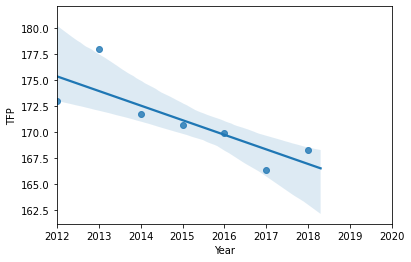

In [3]:
Yap = df.loc[df['Line_ID']==1]
sns.regplot(x=Yap['Year'], y=Yap['TFP'], truncate=False)
plt.xlim(2012, 2020)
plt.show()

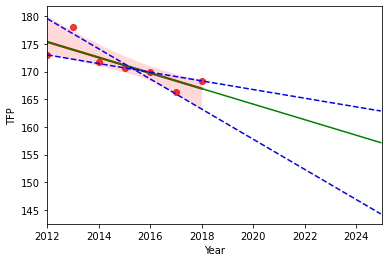

In [4]:
# test data
x=Yap['Year']
y=Yap['TFP']
ax = sns.regplot(x=x, y=y, color="r")

# extend the canvas
plt.xlim([2012,2025])
# plt.ylim([0,15])

# calculate linear regression function
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=x,y=y)

# plot the regression line on the extended canvas
xlims = ax.get_xlim()
new_x = np.arange(xlims[0], xlims[1],(xlims[1]-xlims[0])/250.)
ax.plot(new_x, intercept + slope *  new_x, color='g')
slope_1, intercept_1 = (-0.7821428571428553, 1746.674999999996)
ax.plot(new_x, intercept_1 + slope_1 *  new_x, color='b', linestyle='--')
slope_2, intercept_2 = (-2.7214285714285698, 5655.0499999999965)
ax.plot(new_x, intercept_2 + slope_2 *  new_x, color='b', linestyle='--')

plt.show()

In [5]:
x_train = df.loc[df['Line_ID']==1, ['Line_ID', 'Year']]
y_train = df.loc[df['Line_ID']==1, 'TFP']

x_test = pd.DataFrame()
for i in range(2019, 2026):
    x_test = x_test.append(pd.DataFrame([[1, i]], columns=['Line_ID', 'Year']), ignore_index=True)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

x_test['TFP'] = y_pred

Val_all = pd.DataFrame()
Val = df.loc[df['Line_ID']==1, ['Line_ID', 'Year', 'TFP']]
Val_all = Val.append(x_test, ignore_index=True)

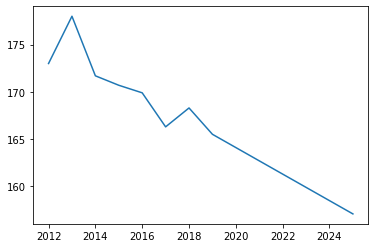

In [6]:
plt.plot(Val_all.loc[(Val_all['Line_ID']==1), 'Year'], Val_all.loc[(Val_all['Line_ID']==1), 'TFP'])
plt.show()

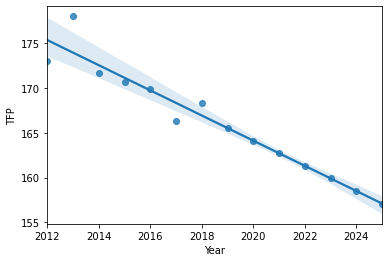

In [7]:
x, y = (Val_all.loc[(Val_all['Line_ID']==1), 'Year'], Val_all.loc[(Val_all['Line_ID']==1), 'TFP'])
sns.regplot(x=x, y=y)
plt.show()